In [1]:
#@title Define if we are on Colab and mount drive { display-mode: "form" }
try:
  from google.colab import drive
  drive.mount('/content/gdrive')
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
#@title (COLAB ONLY) Clone GitHub repo { display-mode: "form" }

if IN_COLAB:
  from getpass import getpass
  user = getpass('GitHub user')
  password = getpass('GitHub password')
  import os
  os.environ['GITHUB_AUTH'] = user + ':' + password
  !git clone https://$GITHUB_AUTH@github.com/lluissalord/radiology_ai.git

  %cd radiology_ai

In [3]:
#@title Setup environment and Colab general variables { display-mode: "form" }
%%capture
%run colab_setup.ipynb

In [4]:
import pandas as pd
import os

from fastai.basics import *
from fastai.medical.imaging import *

In [ ]:
from preprocessing import DCMPreprocessDataset

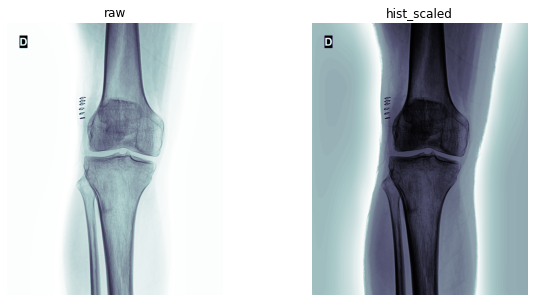

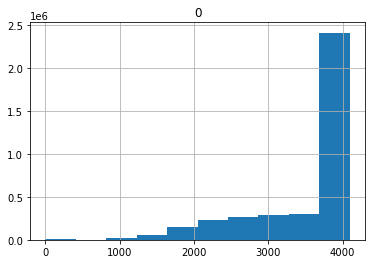

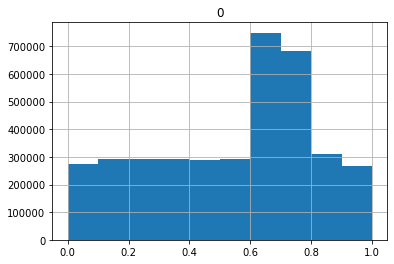

In [5]:
dcms = L([raw_folder + '/03010001140473/44EIARL2F5R93e6KUKCGCH0T5QBG41D06V8N940P0ALE12N6M6UDE']).map(dcmread)
dcm = dcms[0]
scales = False, True
titles = 'raw','hist_scaled'
for s,a,t in zip(scales, subplots(1,2,imsize=5)[1].flat, titles):
    dcm.show(scale=s, ax=a, title=t);
pd.DataFrame(dcm.pixel_array.reshape(-1)).hist();
pd.DataFrame(dcm.hist_scaled().reshape(-1)).hist();

In [6]:
fnames = get_files(organize_folder, extensions='.dcm')
n_samples = 50 # None

dataset = DCMPreprocessDataset(fnames=fnames, padding_to_square=True, resize=None)
bins = dataset.init_bins(n_samples=n_samples)
# dataset.bins = bins

dataset.save(preprocess_folder)

In [7]:
raw_fnames = get_files(raw_folder)
dataset = DCMPreprocessDataset(fnames=raw_fnames, padding_to_square=True, resize=512)

dataset.save(raw_preprocess_folder, overwrite=False, keep=True)